# Question 2
Consider the Mammography dataset available on the resources tab. There are two classes: class 1 indicates calcification (cancer) and class 0 indicates no calcification (no cancer). Thus, the class 1 is the positive class and class 0 is the negative class. You are required to use and compare a neural network classifier (MLPClassifier in scikit-learn, for example) and a decision tree classifier (DecisionTreeClassifier in scikit-learn, for example). You will use 10-fold cross-validation (StratifiedKFold in scikit-learn; also look at cross_val_score) to compare the two classifiers. Please identify classifier is statistically significantly better at 95% confidence when using Error as a metric. Please identify which classifier is statistically significantly better at 95% confidence when using AUC or F-measure as a metric.  Please also discuss if there are any differences in classifier performance when using AUC / F-measure or Error as the evaluation metric.  (30 points)

*Extra Credit: Consider optimizing the decision tree pruning criterion or MLP learning rate / number of units and see if the performance can be improved. (5 points)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
features = ["A", "B", "C", "D", "E", "F", "Class"]
df = pd.read_csv('data/ism.data', names=features)
df.describe()

,A,B,C,D,E,F,Class
count,11183.000000,11183.000000,11183.000000,11183.000000,11183.000000,11183.000000,11183.000000
mean,4.631014,106.292408,0.013124,2.037123,11.476447,0.310368,1.023250
std,5.903782,226.060108,0.022182,2.369981,30.371760,0.328180,0.150702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.990000,17.000000,0.008000,0.000000,0.000000,0.000000,1.000000
75%,6.484500,89.000000,0.018000,3.981000,0.000000,0.644000,1.000000
max,190.650000,1256.000000,0.667000,24.768000,728.770000,0.950000,2.000000


## Neural Network Classifier: MLPClassifier

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
y = df['Class']
x = df.drop(['Class'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.39221229
Iteration 2, loss = 0.30659459
Iteration 3, loss = 0.26062439
Iteration 4, loss = 0.22361089
Iteration 5, loss = 0.19811638
Iteration 6, loss = 0.21046935
Iteration 7, loss = 0.33670801
Iteration 8, loss = 0.19017592
Iteration 9, loss = 0.16295659
Iteration 10, loss = 0.15065099
Iteration 11, loss = 0.14019333
Iteration 12, loss = 0.13215468
Iteration 13, loss = 0.12485765
Iteration 14, loss = 0.12174461
Iteration 15, loss = 0.11624572
Iteration 16, loss = 0.11248981
Iteration 17, loss = 0.10907335
Iteration 18, loss = 0.10595204
Iteration 19, loss = 0.10227354
Iteration 20, loss = 0.10037160
Iteration 21, loss = 0.09789253
Iteration 22, loss = 0.10066281
Iteration 23, loss = 0.09246085
Iteration 24, loss = 0.09382337
Iteration 25, loss = 0.09078553
Iteration 26, loss = 0.08866500
Iteration 27, loss = 0.08712232
Iteration 28, loss = 0.08490597
Iteration 29, loss = 0.08292305
Iteration 30, loss = 0.08258491
Iteration 31, loss = 0.08109420
Iteration 32, los

In [34]:
neural_net_accuracy = accuracy_score(y_test, y_pred)

neural_net_accuracy

0.9810443490701002

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2736,    1],
       [  52,    7]])

## Decision Tree Classifier: DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [33]:
clf = tree.DecisionTreeClassifier()
clf.fit(X=x_train, y=y_train)
clf.feature_importances_
decision_tree_accuracy = clf.score(X=x_test, y=y_test)

decision_tree_accuracy

0.9856938483547926

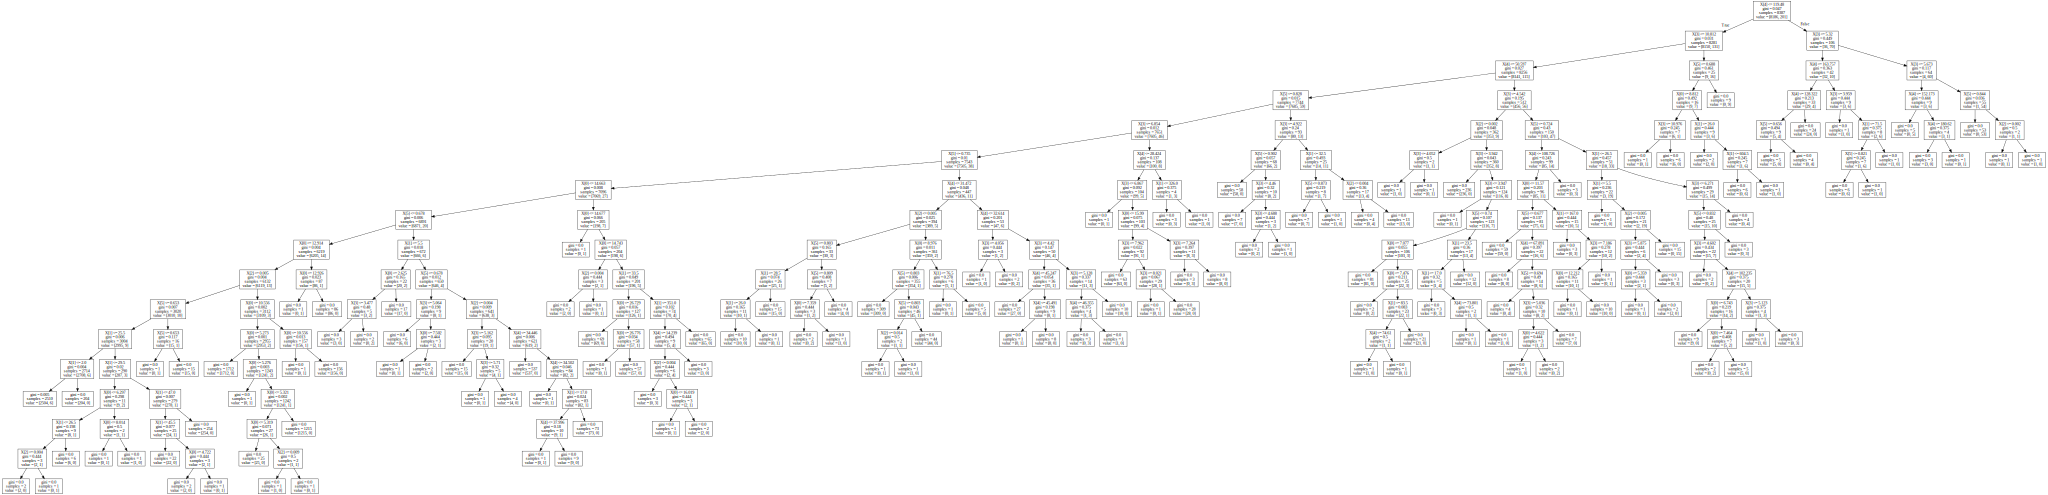

In [32]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph